# Introduction to Time Series Data


Often, we care about processes in the brain as these unfold over time. This practically means that we are acquiring a temporally ordered sequence of measurements, which generates time series data. Time series arise in a variety of scientific disciplines. When describing such time series, there are a couple of properties of importance regarding its _measurement_. It is good to learn this vocabulary well:

* __Sampling Rate__ The (average) rate at which individual samples are acquired, e.g. at 10 Hz - 10 samples/s.
* __Regular vs Irregular Sampling Interval__ Whether or not the samples are always acquired at regular intervals (e.g., always after 1/10 of a second), or not (e.g., sometimes after 1/5, 1/2, ... s)
* __Univariate vs Multivariate__ Whether only a single channel is acquired, or whether concurrent data from multiple channels is acquired


Time series themselves may also exhibit some important general _statistical properties_, e.g.:

* **Autocorrelation** values at time *t + k* are correlated with values at time *t*, indicating dependence of future on past observations.
* **Periodicity** or __Seasonality__, i.e. the presence of recurring patterns at regular intervals (e.g., daily, weekly, or yearly repeating patterns).
* **Noise** random variation not explained by trend, seasonality, or other patterns.

Some other properties that you might not hear about much when discussing neural time series, but that could be important nonetheless are:

* **Stationarity** statistical properties (mean, variance, autocorrelation) remain constant over time. _This is an important assumption for many analysis methods._
* **Ergodicity**, i.e. statistical properties estimated from a single sufficiently long time series are representative of the entire process (ensemble averages ≈ time averages - don't worry if the concept doesn't click here - it is more for the matter of completeness introduced here)
* **Trend** a long-term upward or downward movement in the data.

Knowing this more general vocabulary can help you later when you are looking for certain data analysis methods - if you can phrase your problems in a more general way, you might be able to translate methods from other fields better to your application!



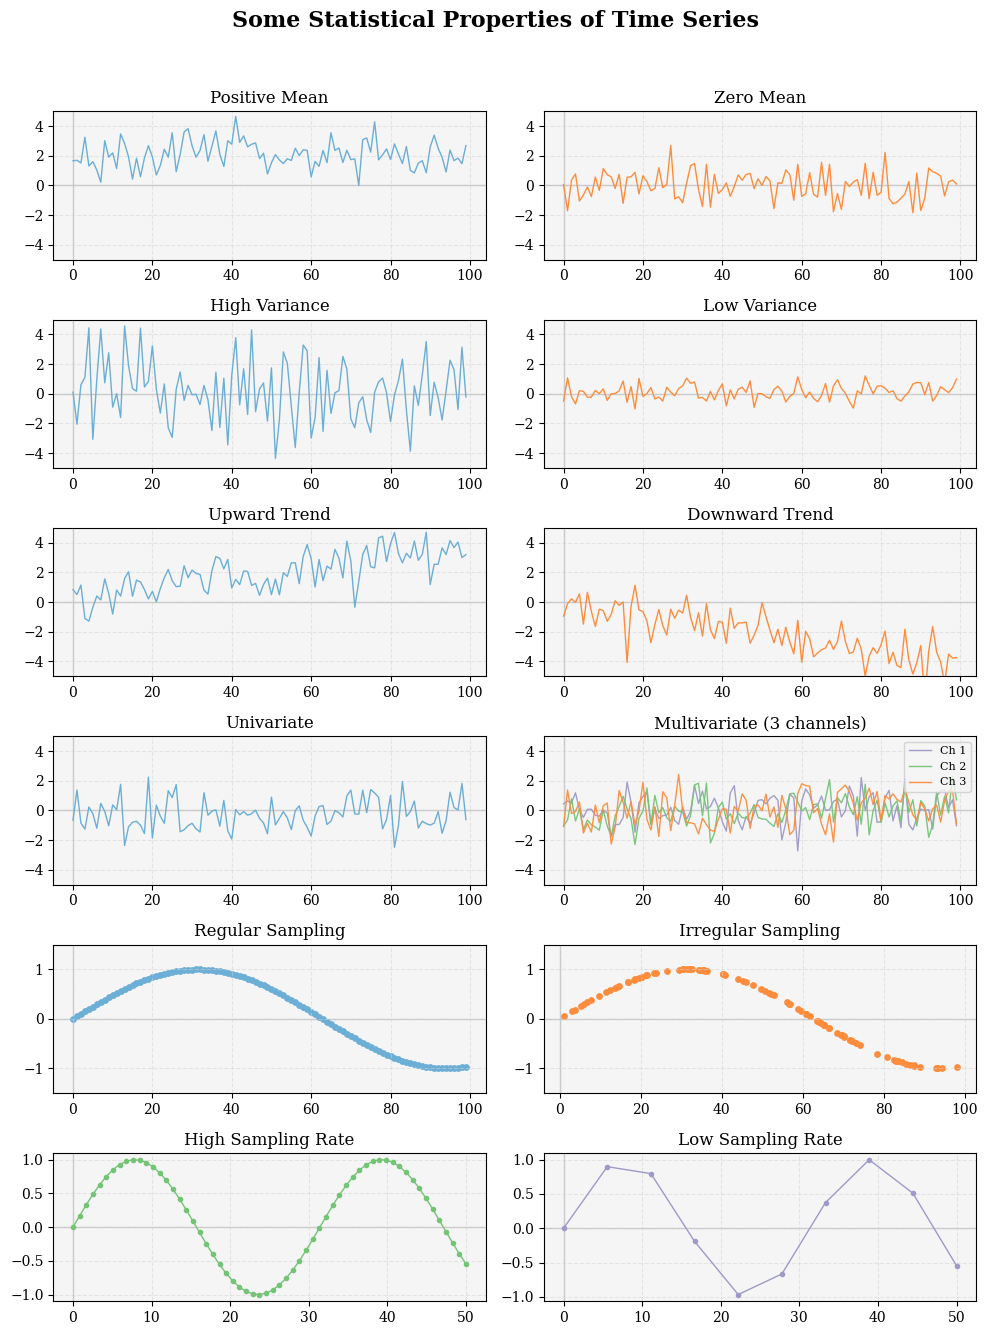

In [137]:
import numpy as np
import matplotlib.pyplot as plt

# --- Publication-style global settings ---
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'whitesmoke',
    'axes.edgecolor': 'black',
    'axes.titleweight': 'regular',
    'font.family': 'serif',
    'font.size': 10,
    'grid.color': 'lightgray',
    'grid.linestyle': '--',
    'grid.alpha': 0.5,
    'lines.linewidth': 1
})

# --- Parameters ---
n_samples = 100
t_regular = np.arange(n_samples)
t_irregular = np.sort(np.random.uniform(0, n_samples, n_samples))

# --- Color palette (pastel) ---
colors = {
    'blue': '#6baed6',      # pastel blue
    'orange': '#fd8d3c',    # pastel orange
    'green': '#74c476',     # pastel green
    'purple': '#9e9ac8'     # pastel purple
}

# --- Prepare figure ---
n_rows, n_cols = 6, 2  # increased row for high vs low sampling rate
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 14))
fig.suptitle("Some Statistical Properties of Time Series", fontsize=16, fontweight='bold')

# 1. Mean: positive vs zero
axes[0,0].plot(np.random.randn(n_samples) + 2, color=colors['blue'])
axes[0,0].set_ylim(-5,5)
axes[0,0].set_title("Positive Mean")
axes[0,1].plot(np.random.randn(n_samples), color=colors['orange'])
axes[0,1].set_ylim(-5,5)
axes[0,1].set_title("Zero Mean")

# 2. Variance: high vs low
axes[1,0].plot(np.random.randn(n_samples) * 2, color=colors['blue'])
axes[1,0].set_ylim(-5,5)
axes[1,0].set_title("High Variance")
axes[1,1].plot(np.random.randn(n_samples) * 0.5, color=colors['orange'])
axes[1,1].set_ylim(-5,5)
axes[1,1].set_title("Low Variance")

# 3. Trend: upward vs downward
axes[2,0].plot(np.arange(n_samples)/(n_samples/4) + np.random.randn(n_samples), color=colors['blue'])
axes[2,0].set_ylim(-5,5)
axes[2,0].set_title("Upward Trend")
axes[2,1].plot(-np.arange(n_samples)/(n_samples/4) + np.random.randn(n_samples), color=colors['orange'])
axes[2,1].set_ylim(-5,5)
axes[2,1].set_title("Downward Trend")

# 4. Univariate vs Multivariate
axes[3,0].plot(np.random.randn(n_samples), color=colors['blue'])
axes[3,0].set_ylim(-5,5)
axes[3,0].set_title("Univariate")

channel_colors = ['#9e9ac8', '#74c476', '#fd8d3c']  # purple, green, orange
for i in range(3):
    axes[3,1].plot(np.random.randn(n_samples), color=channel_colors[i], alpha=0.95)
axes[3,1].set_ylim(-5,5)
axes[3,1].set_title("Multivariate (3 channels)")
axes[3,1].legend([f'Ch {i+1}' for i in range(3)], loc='upper right', fontsize=8)

# 5. Regular vs Irregular sampling
axes[4,0].scatter(t_regular, np.sin(t_regular/20), color=colors['blue'], s=15)
axes[4,0].set_ylim(-1.5,1.5)
axes[4,0].set_title("Regular Sampling")
axes[4,1].scatter(t_irregular, np.sin(t_irregular/20), color=colors['orange'], s=15)
axes[4,1].set_ylim(-1.5,1.5)
axes[4,1].set_title("Irregular Sampling")

# 6. High vs Low sampling rate
t_high = np.linspace(0, 50, 60)  
t_low = np.linspace(0, 50, 10)    
axes[5,0].plot(t_high, np.sin(t_high/5), color=colors['green'], marker='o', linestyle='-', markersize = 3)
axes[5,0].set_title("High Sampling Rate")
axes[5,1].plot(t_low, np.sin(t_low/5), color=colors['purple'], marker='o', linestyle='-', markersize = 3)
axes[5,1].set_title("Low Sampling Rate")

for ax in axes.flatten():
    ax.grid(True)
    ax.axhline(color="darkgrey", alpha=0.6, zorder=-1)
    ax.axvline(color="darkgrey", alpha=0.6, zorder=-1)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()


# Interactive exploration of different time series properties

Run the following code cell to get to an interactive demo that illustrates the different statistical properties of the time series data that we discussed earlier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, IntText

# --- Parameters ---
n_samples_high = 200
n_samples_low = 40
t_high_regular = np.linspace(0, 50, n_samples_high)
t_low_regular = np.linspace(0, 50, n_samples_low)

# Irregular sampling times
np.random.seed(42)
t_high_irregular = np.sort(np.random.uniform(0, 50, n_samples_high))
t_low_irregular = np.sort(np.random.uniform(0, 50, n_samples_low))

colors = {
    'blue': '#6baed6',      
    'orange': '#fd8d3c',    
    'green': '#74c476',     
    'purple': '#9e9ac8'     
}

# --- Interactive plotting function ---
def combined_time_series(mean_choice, variance_choice, trend_choice, sampling_choice, seed):
    np.random.seed(seed)  # set random seed for reproducibility

    # Determine sampling
    if sampling_choice == 'High Rate Regular':
        t = t_high_regular
    elif sampling_choice == 'High Rate Irregular':
        t = t_high_irregular
    elif sampling_choice == 'Low Rate Regular':
        t = t_low_regular
    elif sampling_choice == 'Low Rate Irregular':
        t = t_low_irregular
    
    n_points = len(t)
    
    # Base signal
    ts = np.zeros(n_points)
    
    # Mean
    if mean_choice == 'Zero Mean':
        ts += 0
    elif mean_choice == 'Positive Mean':
        ts += 2
    
    # Variance / noise
    noise = np.random.randn(n_points)
    if variance_choice == 'High Variance':
        noise *= 2
    elif variance_choice == 'Low Variance':
        noise *= 0.5
    ts += noise
    
    # Trend
    if trend_choice == 'Upward':
        ts += np.arange(n_points)/(n_points/4)
    elif trend_choice == 'Downward':
        ts -= np.arange(n_points)/(n_points/4)
    
    # Plot
    plt.figure(figsize=(10,4))
    plt.rcParams.update({
        'figure.facecolor': 'white',
        'axes.facecolor': 'whitesmoke',
        'font.family': 'serif',
        'grid.color': 'lightgray',
        'grid.linestyle': '--',
        'grid.alpha': 0.5,
        'lines.linewidth': 2
    })
    plt.grid(True)
    
    # Marker for irregular or low rate
    if 'Irregular' in sampling_choice or 'Low Rate' in sampling_choice:
        plt.scatter(t, ts, color=colors['orange'], s=20, label='Time Series')
        plt.plot(t, ts, color=colors['purple'], linestyle='-', alpha=0.6)
    else:
        plt.plot(t, ts, color=colors['purple'], label='Time Series')
    plt.gca().set_xlim(-5, 55)
    
    plt.title(f"Time Series \n Parameters: {mean_choice}, {variance_choice}, Trend = {trend_choice}, {sampling_choice}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.show()

# --- Interactive widget ---
interact(
    combined_time_series,
    mean_choice=Dropdown(options=['Zero Mean', 'Positive Mean'], value='Zero Mean', description='Mean:'),
    variance_choice=Dropdown(options=['High Variance', 'Low Variance'], value='High Variance', description='Variance:'),
    trend_choice=Dropdown(options=['None', 'Upward', 'Downward'], value='None', description='Trend:'),
    sampling_choice=Dropdown(options=[
        'High Rate Regular',
        'High Rate Irregular',
        'Low Rate Regular',
        'Low Rate Irregular'
    ], value='High Rate Regular', description='Sampling:'),
    seed=IntText(value=42, description='Random Seed:')
)


interactive(children=(Dropdown(description='Mean:', options=('Zero Mean', 'Positive Mean'), value='Zero Mean')…

<function __main__.combined_time_series(mean_choice, variance_choice, trend_choice, sampling_choice, seed)>

## Quick Thought: Properties of Neural Time Series

Have a look at the properties in the prevous code cell - using that vocabulary, how would you describe neural time series data that you already heard about, e.g. EEG or LFP recordings?

_food for thought:_

* What are advantages / disadvantages of high vs low sampling rates?
* Do you think it's better to have a regular or irregular sampling rate, why/ why not?
* Do you think it is common for neural time series to exhibit a _trend_, _autocorrelation_ and/or _periodicity_?

## Exploring Autocorrelation

In this exercise, you can use your knowledge of `numpy` and `matplotlib` to **simulate and visualize an autocorrelated time series**. The goal is not just to generate the series, but also to start forming a mental scaffolding of the steps and concepts involved. Try to think through what you want to do **before coding**, and break the problem into manageable parts. This also involves finding the appropriate functions to e.g., generate random numbers from a gaussian or uniform distribution.

For this exercise, we want to simulate a so called AR(1) process, i.e., the next sample only directly depends on the previous sample.

**Hints / Guidance:**

* **Start simple**: first generate a random time series without any autocorrelation to make sure plotting and array handling works.
* **Understand the components**: an autocorrelated time series has a **random component** (e.g., normally distributed noise) and a **history-dependent component** (the autoregressive term). Think about how these two parts combine at each step mathematically.
* **Parameters**: generate at least 500 samples and test different autocorrelation strengths (e.g., 0, 0.5, 0.9, 0.99) and plot how the series changes.
* Take the time to inspect each plot and to describe what patterns you see emerging.

__Further Considerations__
* Actually calculate the autocorrelation of your generated AR(1) time series - is it close to you desired coefficient?
* How does the choice of initial value at _t0_ of the time series modulate the trajectory? How does giving the process specific impulses (e.g., especially high or low values at specific indices) change its behaviour?
* Once done with the basic implementation, you may also try to work on a higher order autoregressive process, e.g. AR(3). For this, it might be interesting to give each _lag_ a different strength of autocorrelation (usually, t-1 exhibits the strongest autocorrelation, so `ar1` > `ar2` ...).





In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Simulating an autocorrelated time series


## Periodicity

Periodic phenomena are characterized by the more-or-less regular reoccurence of specific patterns in the data. One periodic phenomenon that you know is the annual succession of the different seasons, and the corresponding changes in temperature in the moderate climates of the northern or southern hemisphere.
There are many periodic or quasi-periodic phenomena in our world. The following code simulates two signals with the same periodicity - however, they differ in some other ways.

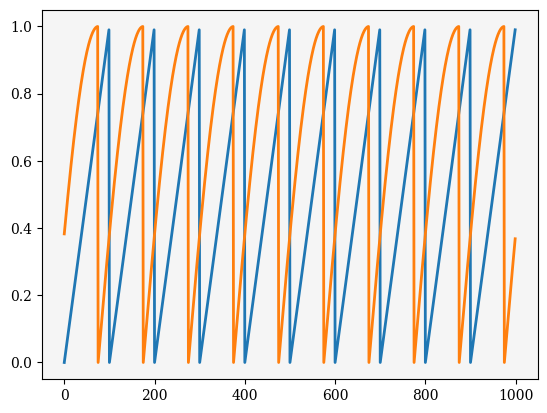

In [6]:
n_times = 1000
ts = np.zeros(n_times)
period = 100
max_amp = 1

for idx in range(n_times):
    ts[idx] = (idx%period) * (max_amp / period)
plt.plot(ts)
for idx in range(n_times):
    ts[idx] = np.sin(((idx+ 25)%period)/(2*period)*np.pi)
plt.plot(ts)

## Stationarity

Stationarity means that the statistical properties, such as the mean, variance, or the autocorrelative structure, do not change over time. In the following, we want to simulate and plot a non-stationary signal with time-varying standard deviation / variance. How exactly the variance changes with time is up to you!

__Hint__:

* You can change the variance of a random number by multipying the output of a random number generator by the standard deviation


In [ ]:
# Implement a non-stationary signal here.


# 